$max f(x) = \frac{0.5}{\sqrt{1+x^2}} - \sqrt{1+x^2} \left( 1 - \frac{0.5}{1+x^2} \right) + x$

In [1]:
def f(x):
    global evalF
    evalF += 1
    return (0.5/(1+x**2)**(1/2)) - (1+x**2)**(1/2) * (1- (0.5/(1+x**2))) + x

# 1.

## (a) 
### Estimaciones cuadráticas

In [2]:
x1,Delta,eps = 0,0.1,0.0001 #input().split(',')   
x1,Delta,eps = float(x1),float(Delta),float(eps)
evalF = 0
fs = {}

def f(x):
    global evalF
    evalF += 1
    return (0.5/(1+x**2)**(1/2)) - (1+x**2)**(1/2) * (1- (0.5/(1+x**2))) + x


def get_f(x):
    global fs
    if x in fs.keys():
        fx = fs[x]
        return fx
    else:
        fs[x] = -f(x)
        return fs[x]
        
def get_xb(x1,x2,x3,f1,f2,f3):
    a0 = f1
    a1 = (f2-f1)/(x2-x1)
    a2 = (1/(x3-x2)) * \
         (((f3-f1)/(x3-x1)) - ((f2-f1)/(x2-x1)))
    xb = (x1+x2)/2 - (a1/(2*a2))
    return xb


x2 = x1 + Delta
x3 = None
if get_f(x1) > get_f(x2):
    x3 = x2 + Delta

else:
    x3 = x1 - Delta

x1,x2,x3 = sorted([x1,x2,x3])
f1,f2,f3 = get_f(x1),get_f(x2),get_f(x3)
xb,fb = 0,0

iters = 3
while True:
    xmin = x1
    fmin = f1
    
    xb = get_xb(x1,x2,x3,f1,f2,f3)
    
    xs_fs = [[x1,f1],[x2,f2],[x3,f3],[xb,get_f(xb)]]
    xs_fs = sorted(xs_fs, key=lambda x: x[1])
    
    x1,x2,x3 = xs_fs[0][0], xs_fs[1][0], xs_fs[2][0]
    f1,f2,f3 = xs_fs[0][1], xs_fs[1][1], xs_fs[2][1]
    
    if abs(xmin - xb) < eps:
        break
    iters += 1
print('({}, {})\n{}'.format("%.3f"%xb,"%.3f"%-get_f(xb),evalF))

(0.786, 0.300)
12


## (b)
### Newton - Raphson

##### Primera derivada

$f(x) = \frac{0.5}{\sqrt{1+x^2}} - \sqrt{1+x^2} \left( 1 - \frac{0.5}{1+x^2} \right) + x$

$\frac{d}{dx} f(x) = \frac{d}{dx} \frac{0.5}{\sqrt{1+x^2}} - \frac{d}{dx} \left[ \sqrt{1+x^2} \left( 1 - \frac{0.5}{1+x^2} \right) \right] + \frac{d}{dx} x$      

$\frac{d}{dx} f(x) = \frac{d}{dx} \frac{1}{2\sqrt{1+x^2}} - \frac{d}{dx} \left[ \sqrt{1+x^2} \left( 1 - \frac{1}{2(1+x^2)} \right) \right] + 1$      

$$\frac{d}{dx} \frac{1}{2\sqrt{1+x^2}} = \frac{1}{2} \frac{d}{dx} \frac{1}{\sqrt{1+x^2}}$$     
$$ = \frac{1}{2} \frac{d}{dx} (1+x^2)^{-\frac{1}{2}}$$   
$$ = \frac{1}{2} \left(-\frac{1}{2} (1+x^2)^{-\frac{3}{2}} \frac{d}{dx} (1+x^2) \right)$$     
$$ = \frac{1}{2} \left(-\frac{2x}{2(1+x^2)^{\frac{3}{2}}} \right)$$     
$$ = -\frac{x}{2(1+x^2)^{\frac{3}{2}}}$$ 

$\frac{d}{dx} f(x) = -\frac{x}{2(1+x^2)^{\frac{3}{2}}}  - \frac{d}{dx} \left[ \sqrt{1+x^2} \left( 1 - \frac{1}{2(1+x^2)} \right) \right] + 1$

$$ \frac{d}{dx} \left[ \sqrt{1+x^2} \left( 1 - \frac{1}{2(1+x^2)} \right) \right]$$       
$$= \frac{d}{dx} \sqrt{1+x^2} \left( 1-\frac{1}{2(1+x^2)} \right) + \sqrt{1+x^2} \frac{d}{dx}  \left( 1-\frac{1}{2(1+x^2)} \right) $$    
$$= \frac{1}{2}(x^2+1)^{-\frac{1}{2}} \cdot \frac{d}{dx} (1+x^2) \left( 1-\frac{1}{2(1+x^2)} \right) + \sqrt{1+x^2} \left( 0 - \frac{1}{2} \cdot \frac{d}{dx} \frac{1}{1+x^2} \right) $$    
$$= \frac{\frac{d}{dx} (1+x^2) \left( 1-\frac{1}{2(1+x^2)} \right)}{2\sqrt{1+x^2}}   + \frac{\sqrt{1+x^2} \cdot x}{(1+x^2)^2}  $$    
$$= \frac{2x \left( 1-\frac{1}{2(1+x^2)} \right)}{2\sqrt{1+x^2}}   +\frac{x}{(1+x^2)^\frac{3}{2}}  $$   

$$= \frac{x \left( 1-\frac{1}{2(1+x^2)} \right)}{\sqrt{1+x^2}}   +\frac{x}{(1+x^2)^\frac{3}{2}}  $$   

$\frac{d}{dx} f(x) = -\frac{x}{2(1+x^2)^{\frac{3}{2}}}  - \frac{x \left( 1-\frac{1}{2(1+x^2)} \right)}{\sqrt{1+x^2}} - \frac{x}{(1+x^2)^\frac{3}{2}}  + 1$

$\frac{d}{dx} f(x) = -\frac{x}{2(1+x^2)^{\frac{3}{2}}}  - \frac{x \left( 1-\frac{1}{2(1+x^2)} \right)}{\sqrt{1+x^2}} - \frac{2x}{2(1+x^2)^\frac{3}{2}}  + 1$

$\frac{d}{dx} f(x) = - \frac{3x}{2(1+x^2)^{\frac{3}{2}}}  - \frac{x \left( 1-\frac{1}{2(1+x^2)} \right)}{\sqrt{1+x^2}} + 1$

$$ \frac{x \left( 1-\frac{1}{2(1+x^2)} \right)}{\sqrt{1+x^2}} = \frac{x}{\sqrt{1+x^2}} - \frac{\frac{x}{2(1+x^2)}}{\sqrt{1+x^2}}$$    
$$= \frac{x}{\sqrt{1+x^2}} -\frac{x}{2(1+x^2)\sqrt{1+x^2}}$$     
$$= \frac{x}{\sqrt{1+x^2}} -\frac{x}{2(1+x^2)^{\frac{3}{2}}}$$     


$\frac{d}{dx} f(x) = - \frac{3x}{2(1+x^2)^{\frac{3}{2}}}  -  \frac{x}{\sqrt{1+x^2}} +\frac{x}{2(1+x^2)^{\frac{3}{2}}} + 1$     
$\frac{d}{dx} f(x) = - \frac{2x}{2(1+x^2)^{\frac{3}{2}}}  -  \frac{x}{\sqrt{1+x^2}} + 1$     
$\frac{d}{dx} f(x) = - \frac{x}{(1+x^2)^{\frac{3}{2}}}  -  \frac{x}{\sqrt{1+x^2}} + 1$     

$$ \frac{x}{\sqrt{1+x^2}} = \frac{(1+x^2)x}{(1+x^2)\sqrt{1+x^2}}$$    
$$ = \frac{x+x^3}{(1+x^2)^{\frac{3}{2}}} $$     

$\frac{d}{dx} f(x) = - \frac{x}{(1+x^2)^{\frac{3}{2}}}  -  \frac{x+x^3}{(1+x^2)^{\frac{3}{2}}} + 1$     

$\frac{d}{dx} f(x) = \frac{-2x-x^3}{(1+x^2)^{\frac{3}{2}}} + 1$     

😃

##### Segunda derivada

$\frac{d^2}{dx^2} f(x) = \frac{-2x-x^3}{(1+x^2)^{\frac{3}{2}}} + 1$

$\frac{d^2}{dx^2} f(x) = \frac{d}{dx} \frac{-2x-x^3}{(1+x^2)^{\frac{3}{2}}} + \frac{d}{dx} 1$     

$\frac{d^2}{dx^2} f(x) = \frac{d}{dx} \frac{-2x-x^3}{(1+x^2)^{\frac{3}{2}}} $     

$\frac{d^2}{dx^2} f(x) = \frac{\frac{d}{dx}\left[-2x-x^3\right] \cdot (1+x^2)^{\frac{3}{2}} -\, (-2x-x^3) \cdot \frac{d}{dx} \left[1+x^2)^{\frac{3}{2}}\right]}{\left((1+x^2)^{\frac{3}{2}}\right)^2} $     

$\frac{d^2}{dx^2} f(x) = \frac{\frac{d}{dx}\left[-2x-x^3\right] \cdot (1+x^2)^{\frac{3}{2}} -\, (-2x-x^3) \cdot \frac{d}{dx} \left[1+x^2)^{\frac{3}{2}}\right]}{(1+x^2)^{3}} $     

$$\frac{d}{dx}\left[-2x-x^3\right] \cdot (1+x^2)^{\frac{3}{2}}$$     
$$ = (-2-3x^2) \cdot (1+x^2)^{\frac{3}{2}}$$     
$$ = (-2-3x^2) \cdot (1+x^2)^{\frac{3}{2}}$$     

$$(-2x-x^3) \cdot \frac{d}{dx} \left[1+x^2)^{\frac{3}{2}}\right]$$     
$$ = (-2x-x^3) \cdot \frac{3}{2} (1+x^2)^{\frac{1}{2}}2x$$     
$$ = (-2x-x^3) \cdot 3x \sqrt{1+x^2}$$     

$\frac{d^2}{dx^2}f(x) = \frac{(-2-3x^2) \cdot (1+x^2)^{\frac{3}{2}} -\, (-2x-x^3) \cdot 3x \sqrt{1+x^2}}{(1+x^2)^{3}} $     

$\frac{d^2}{dx^2} f(x) = \frac{(-2-3x^2) \cdot (1+x^2)^{\frac{3}{2}}}{(1+x^2)^{3}} - \frac{(-2x-x^3) \cdot 3x \sqrt{1+x^2}}{(1+x^2)^{3}} $     

$$\frac{(-2-3x^2) \cdot (1+x^2)^{\frac{3}{2}}}{(1+x^2)^{3}}$$     
$$ = \frac{-2-3x^2}{(1+x^2)^{\frac{3}{2}}}$$      

$\frac{d^2}{dx^2} f(x) = \frac{-2-3x^2}{(1+x^2)^{\frac{3}{2}}} - \frac{(-2x-x^3) \cdot 3x \sqrt{1+x^2}}{(1+x^2)^{3}} $     

$$\frac{(-2x-x^3) \cdot 3x \sqrt{1+x^2}}{(1+x^2)^{3}}$$      
$$ = \frac{(-2x-x^3) \cdot 3x}{(1+x^2)^{\frac{5}{2}}}$$      
$$ = \frac{-6x^2-3x^4}{(1+x^2)^{\frac{5}{2}}}$$      

$\frac{d^2}{dx^2} f(x) = \frac{-2-3x^2}{(1+x^2)^{\frac{3}{2}}} - \frac{-6x^2-3x^4}{(1+x^2)^{\frac{5}{2}}} $     

$\frac{d^2}{dx^2} f(x) = \frac{(1+x^2)-2-3x^2}{(1+x^2)(1+x^2)^{\frac{3}{2}}} - \frac{-6x^2-3x^4}{(1+x^2)^{\frac{5}{2}}} $     

$\frac{d^2}{dx^2} f(x) = \frac{-2-3x^2-2x^2-3x^4}{(1+x^2)^{\frac{5}{2}}} - \frac{-6x^2-3x^4}{(1+x^2)^{\frac{5}{2}}} $     

$\frac{d^2}{dx^2} f(x) = \frac{x^2-2}{(1+x^2)^{\frac{5}{2}}}$     

##### Algoritmo

In [3]:
x0,eps = 0,0.0001 #input().split(',') 
x0,eps = float(x0),float(eps)
evalF = 0

def f(x):
    return -((0.5/(1+x**2)**(1/2)) - (1+x**2)**(1/2) * (1- (0.5/(1+x**2))) + x)

def fp(x):
    global evalF
    evalF += 1
    return -(( (-2*x - x**3) / (1+x**2)**(3/2) ) + 1)

def fpp(x):
    return -(((x**2) - 2)/((x**2) + 1)**(5/2))

k = 1
xk = x0
fpx = 0
while True:
    fpx = fp(xk)
    xk = xk - fpx/fpp(xk)
    k += 1
    #print(xk)
    if not abs(fpx) > eps:
        break
print('({},{})\n{}'.format("%.3f"%xk,"%.3f"%-f(xk),evalF))

(0.786,0.300)
6


## (c)
### Cuasi Newton

In [4]:
x0,eps,delta = 0, 0.0001, 0.01 #input().split(',') 
x0,eps,delta = float(x0),float(eps),float(delta)
evalF = 0
fs = {}

def get_f(x):
    global fs
    if x in fs.keys():
        fx = fs[x]
        return fx
    else:
        fs[x] = f(x)
        return fs[x]

def f(x):
    global evalF
    evalF += 1
    return -((0.5/(1+x**2)**(1/2)) - (1+x**2)**(1/2) * (1- (0.5/(1+x**2))) + x)

def fp(x):
    global delta
    return (get_f(x+delta)-get_f(x-delta))/(2*delta)

def fpp(x):
    global delta
    return (get_f(x+delta) - 2*get_f(x) + get_f(x-delta)) / delta**2

xk = x0
fpx = 0
while True:
    fpx = fp(xk)
    if not abs(fpx) > eps:
        print('({:.3f},{:.3f})\n{}'.format(xk,-get_f(xk),evalF))
        break
    xk = xk - fpx/fpp(xk)

(0.786,0.300)
18


## (d)
### Bisección

In [5]:
a,b,eps = 0, 5, 0.0001 #input().split(',') 
a,b,eps = float(a),float(b),float(eps)
evalF = 0
fps = {}

def get_fp(x):
    global fps
    if x in fps.keys():
        fpx = fps[x]
        return fpx
    else:
        fps[x] = fp(x)
        return fps[x]

def f(x):
    return (0.5/(1+x**2)**(1/2)) - (1+x**2)**(1/2) * (1- (0.5/(1+x**2))) + x


def fp(x):
    global evalF
    evalF += 1
    return ( (-2*x - x**3) / (1+x**2)**(3/2) ) + 1

z = 0
 
while True:
    z = (a+b)/2
    fpz = -get_fp(z)
    if fpz < 0:
        a = z
    else:
        b = z
        
    if not -get_fp(a) <= 0 or not -get_fp(b) >= 0:
        print ('Error')
        break
    if not abs(fpz) > eps:
        print('({},{})\n{}'.format("%.3f"%z,"%.3f"%f(z),evalF+1))
        break



(0.786,0.300)
12


## (e)
### Secante

In [6]:
x_L,x_R,eps = 0,5,0.0001 #input().split(',') 
x_L,x_R,eps = float(x_L),float(x_R),float(eps)
evalF = 0
fps = {}

def get_fp(x):
    global fps
    if x in fps.keys():
        fpx = fps[x]
        return fpx
    else:
        fps[x] = fp(x)
        return fps[x]

def f(x):
    return (0.5/(1+x**2)**(1/2)) - (1+x**2)**(1/2) * (1- (0.5/(1+x**2))) + x

def fp(x):
    global evalF
    evalF += 1
    return ( (-2*x - x**3) / (1+x**2)**(3/2) ) + 1

 
while True:
    if not (get_fp(x_L)*get_fp(x_R)) < 0:
        print('Error')
        break
    z = x_R - (-get_fp(x_R)*(x_R-x_L)) / (-(get_fp(x_R)-get_fp(x_L)))
    fpz = -get_fp(z)
    if fpz < 0:
        x_L = z
    else:
        x_R = z
    
    if abs(fpz) <= eps:
        print('({},{})\n{}'.format("%.3f"%z,"%.3f"%f(z),evalF))
        break


(0.786,0.300)
56


# 2.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

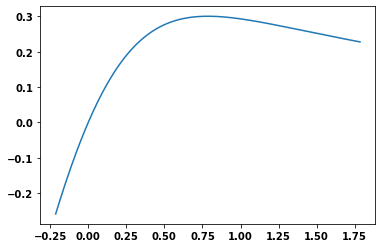

In [8]:
xs = np.arange(0.786-1,0.786+1,0.001)
xlist = xs
ylist = [f(i) for i in xs]
plt.plot(xlist, ylist)
plt.show()

# 3.

In [9]:
from math import e

$min\, g(x) = e^x - x^3$

In [10]:
def g(x):
    return e**x - (x**3)

Grafiqué la función en desmos y el óptimo está entre los valores que grafiqué, sin embargo para que sea unimodal, en la optimización tuve que acotar el intervalo y quedó [1.5,6], y con una precisión de 0.0001.

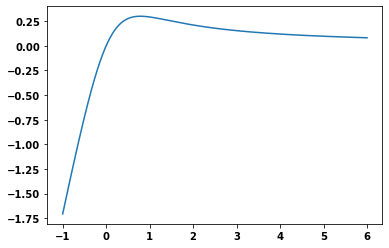

In [11]:
xs = np.arange(-1,6,0.001)
xlist = xs
ylist = [f(i) for i in xs]
plt.plot(xlist, ylist)
plt.show()

### Secante

In [12]:
x_L,x_R,eps = 1.5,6,0.0001 #input().split(',') 
x_L,x_R,eps = float(x_L),float(x_R),float(eps)
evalF = 0
fps = {}

def get_fp(x):
    global fps
    if x in fps.keys():
        fpx = fps[x]
        return fpx
    else:
        fps[x] = fp(x)
        return fps[x]

def f(x):
    return e**x - (x**3)

def fp(x):
    global evalF
    evalF += 1
    return e**x - (3*(x**2))
 
while True:
    if not (get_fp(x_L)*get_fp(x_R)) < 0:
        print('Error')
        break
    z = x_R - (get_fp(x_R)*(x_R-x_L)) / (get_fp(x_R)-get_fp(x_L))
    fpz = get_fp(z)
    if fpz < 0:
        x_L = z
    else:
        x_R = z
    
    if abs(fpz) <= eps:
        print('({},{})\n{}'.format("%.3f"%z,"%.3f"%f(z),evalF))
        break


(3.733,-10.216)
104
